In [ ]:
#00. 패키지 호출
import pandas as pd 
import numpy as np 
import warnings 
import datetime
import matplotlib as mpl
import matplotlib.pylab as plt
from sklearn.linear_model import ElasticNet # 엘라스틱넷
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error,accuracy_score

#00-1. warning message ignore 
warnings.filterwarnings(action='ignore')

#00-2. 난수씨드값 지정하기.
np.random.seed(2021)

#00-3. 시각화 옵션 설정하기. 
%matplotlib inline

In [ ]:
# load data
df = pd.read_csv("C:/폐교/다중회귀_종사자수.csv")
df.head()

,city,silver_hall,year,stress,melancholy,고령인구비율,65세이상인구,전체인구,상대적빈곤율(중위소득60%이하),생활비에 보탬이 되기위해 취업희망 노인수,welfare_facil_w,welfare_staff
0,창원시,953,2013,14.8,3.4,9.4,101571,1083731,51394.926,37069.149020,0.003946,59
1,진주시,515,2013,26.0,11.5,13.1,44016,337071,22272.096,25661.328000,0.004881,13
2,통영시,207,2013,21.4,6.0,13.4,18685,139719,9454.610,6819.240230,0.005452,5
3,사천시,330,2013,19.7,2.7,16.9,19738,116851,9987.428,7203.541004,0.005348,1
4,김해시,532,2013,16.4,2.8,8.0,41790,522049,21145.740,15251.594820,0.005192,35


In [ ]:
# 칼럼 확인
df.columns

Index(['city', 'silver_hall', 'year', 'stress', 'melancholy', '고령인구비율',
       '65세이상인구', '전체인구', '상대적빈곤율(중위소득60%이하)', '생활비에 보탬이 되기위해 취업희망 노인수',
       'welfare_facil_w', 'welfare_staff'],
      dtype='object')

In [ ]:
# 원본 보관 
df_raw = df

# 불필요한 칼럼 삭제
del df['city']
del df['year']
del df['전체인구']

df

,silver_hall,stress,melancholy,고령인구비율,65세이상인구,상대적빈곤율(중위소득60%이하),생활비에 보탬이 되기위해 취업희망 노인수,welfare_facil_w,welfare_staff
0,953,14.8,3.4,9.4,101571,51394.926,37069.149020,0.003946,59
1,515,26.0,11.5,13.1,44016,22272.096,25661.328000,0.004881,13
2,207,21.4,6.0,13.4,18685,9454.610,6819.240230,0.005452,5
3,330,19.7,2.7,16.9,19738,9987.428,7203.541004,0.005348,1
4,532,16.4,2.8,8.0,41790,21145.740,15251.594820,0.005192,35
...,...,...,...,...,...,...,...,...,...
139,382,17.2,3.1,34.6,15490,7837.940,5614.948416,0.005382,7
140,342,11.3,4.3,36.8,12833,6493.498,4679.652096,0.005425,0
141,408,17.4,5.1,33.8,13227,6692.862,4830.646968,0.005382,0
142,438,13.7,4.0,27.7,17026,8615.156,6327.517392,0.005469,14


# EDA

In [ ]:
corr_matrix = df.corr()

# 타겟값을 기준으로 관계가 높은 다른 특성들을 정렬해서 역순으로 나열해봅시다.

corr_matrix["welfare_staff"].sort_values(ascending=False)

welfare_staff             1.000000
65세이상인구                   0.923427
상대적빈곤율(중위소득60%이하)         0.923427
생활비에 보탬이 되기위해 취업희망 노인수    0.904260
silver_hall               0.808441
melancholy               -0.040442
stress                   -0.128504
고령인구비율                   -0.511882
welfare_facil_w          -0.753313
Name: welfare_staff, dtype: float64

가장 높은 양의 상관관계를 갖는 특성은 복지시설 필요도가 높은 시군구이다. 그 다음으로 고령인구비율, stress 등의 특성이 나열되어 있다.

In [ ]:
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
import matplotlib as mpl
import matplotlib.font_manager as fm
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 10

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

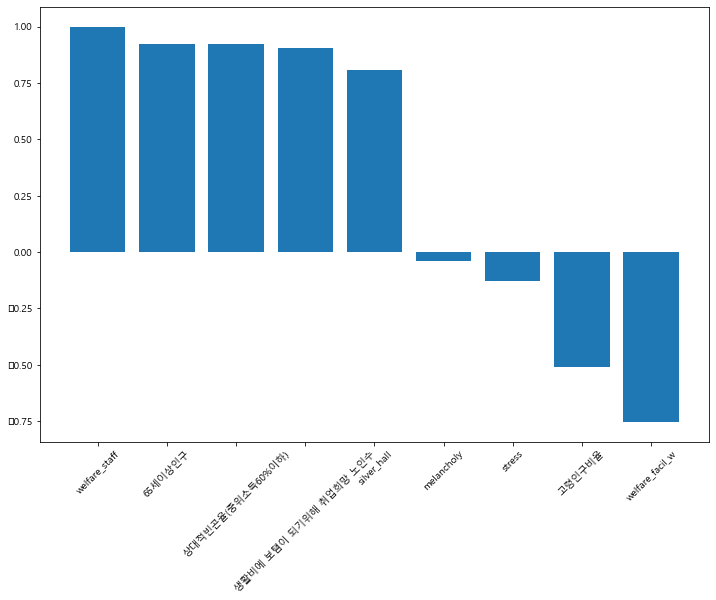

In [ ]:
corr_df = pd.DataFrame(corr_matrix["welfare_staff"].sort_values(ascending=False))

plt.figure(figsize=(12,8))
plt.bar(corr_df.index, corr_df["welfare_staff"])
plt.xticks(rotation=45)

array([[<AxesSubplot:xlabel='65세이상인구', ylabel='65세이상인구'>,
        <AxesSubplot:xlabel='상대적빈곤율(중위소득60%이하)', ylabel='65세이상인구'>,
        <AxesSubplot:xlabel='생활비에 보탬이 되기위해 취업희망 노인수', ylabel='65세이상인구'>,
        <AxesSubplot:xlabel='silver_hall', ylabel='65세이상인구'>],
       [<AxesSubplot:xlabel='65세이상인구', ylabel='상대적빈곤율(중위소득60%이하)'>,
        <AxesSubplot:xlabel='상대적빈곤율(중위소득60%이하)', ylabel='상대적빈곤율(중위소득60%이하)'>,
        <AxesSubplot:xlabel='생활비에 보탬이 되기위해 취업희망 노인수', ylabel='상대적빈곤율(중위소득60%이하)'>,
        <AxesSubplot:xlabel='silver_hall', ylabel='상대적빈곤율(중위소득60%이하)'>],
       [<AxesSubplot:xlabel='65세이상인구', ylabel='생활비에 보탬이 되기위해 취업희망 노인수'>,
        <AxesSubplot:xlabel='상대적빈곤율(중위소득60%이하)', ylabel='생활비에 보탬이 되기위해 취업희망 노인수'>,
        <AxesSubplot:xlabel='생활비에 보탬이 되기위해 취업희망 노인수', ylabel='생활비에 보탬이 되기위해 취업희망 노인수'>,
        <AxesSubplot:xlabel='silver_hall', ylabel='생활비에 보탬이 되기위해 취업희망 노인수'>],
       [<AxesSubplot:xlabel='65세이상인구', ylabel='silver_hall'>,
        <AxesSubplot:xlabel='상대적빈곤율(중위소득60%이하)', yla

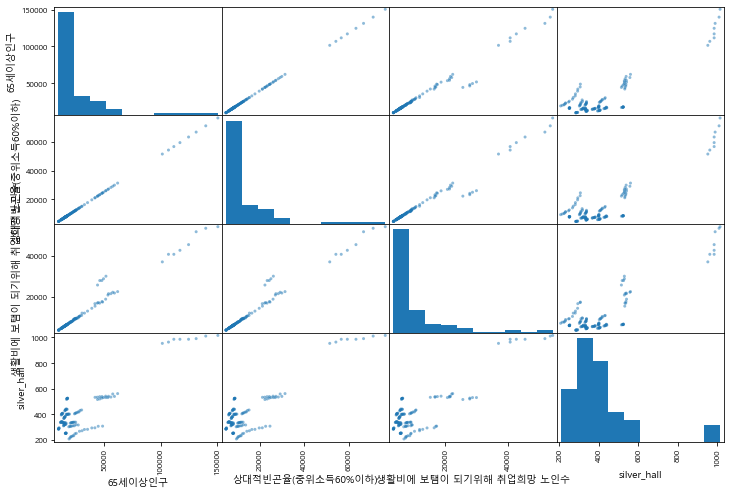

In [8]:
from pandas.plotting import scatter_matrix

attributes = ['65세이상인구','상대적빈곤율(중위소득60%이하)','생활비에 보탬이 되기위해 취업희망 노인수','silver_hall']
scatter_matrix(df[attributes], figsize=(12, 8))

# 모델링 데이터 준비

In [9]:
from sklearn.model_selection import train_test_split

x = df[['65세이상인구','상대적빈곤율(중위소득60%이하)','생활비에 보탬이 되기위해 취업희망 노인수','silver_hall','melancholy','stress','고령인구비율','welfare_facil_w']]
y = df[['welfare_staff']]

x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.7, test_size = 0.3)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((100, 8), (44, 8), (100, 1), (44, 1))

# 엘라스틱넷 모델링

In [10]:
# 모형 생성
model_elastic = ElasticNet()
model_elastic.fit(x_train, y_train)

ElasticNet()

# 모델 테스트

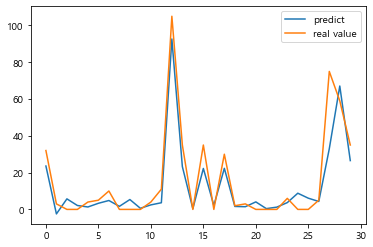

In [11]:
plt.plot(model_elastic.predict(x_test[:30]), label="predict")
plt.plot(y_test[:30].values.reshape(-1, 1), label="real value")
plt.legend()

테스트셋의 x 데이터 30개를 이용해 rent 비용을 예측하고 실제 테스트셋의 y데이터를 확인한 결과 대체적으로 비슷한 결과

전체 test 데이터를 이용해 값을 예측하고 실제 값과 비교하여 산점도를 그려 선형적인 모습인지 확인

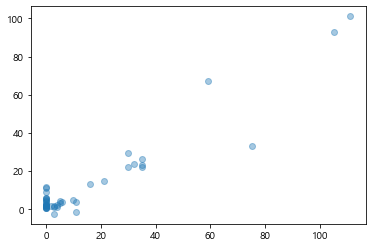

In [12]:
y_predict = model_elastic.predict(x_test)

plt.scatter(y_test, y_predict, alpha = 0.4)
plt.show()

In [13]:
print(model_elastic.score(x_train, y_train))

0.8172134007528823


In [14]:
# 데이터셋 스케일링
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaling = scaler.fit_transform(df.iloc[:,:-1])
df_scaling = pd.DataFrame(df_scaling, columns=['65세이상인구','상대적빈곤율(중위소득60%이하)','생활비에 보탬이 되기위해 취업희망 노인수','silver_hall','melancholy','stress','고령인구비율','welfare_facil_w'])
df_scaling['welfare_staff'] = df.iloc[:,-1].astype('int')
df_scaling

,65세이상인구,상대적빈곤율(중위소득60%이하),생활비에 보탬이 되기위해 취업희망 노인수,silver_hall,melancholy,stress,고령인구비율,welfare_facil_w,welfare_staff
0,0.923267,0.374172,0.131707,0.056250,0.651675,0.651675,0.660215,0.115984,59
1,0.381188,0.745033,0.526829,0.171875,0.245305,0.245305,0.436625,0.629284,13
2,0.000000,0.592715,0.258537,0.181250,0.066454,0.066454,0.067325,0.942966,5
3,0.152228,0.536424,0.097561,0.290625,0.073889,0.073889,0.074857,0.885933,1
4,0.402228,0.427152,0.102439,0.012500,0.229588,0.229588,0.232597,0.800383,35
...,...,...,...,...,...,...,...,...,...
139,0.216584,0.453642,0.117073,0.843750,0.043895,0.043895,0.043721,0.904647,7
140,0.167079,0.258278,0.175610,0.912500,0.025136,0.025136,0.025389,0.928485,0
141,0.248762,0.460265,0.214634,0.818750,0.027917,0.027917,0.028349,0.904647,0
142,0.285891,0.337748,0.160976,0.628125,0.054740,0.054740,0.057687,0.952323,14


In [15]:
# 결측값 확인
df_scaling.isna().sum()

65세이상인구                   0
상대적빈곤율(중위소득60%이하)         0
생활비에 보탬이 되기위해 취업희망 노인수    0
silver_hall               0
melancholy                0
stress                    0
고령인구비율                    0
welfare_facil_w           0
welfare_staff             0
dtype: int64

In [16]:
# 데이터셋 탐색
df_scaling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   65세이상인구                 144 non-null    float64
 1   상대적빈곤율(중위소득60%이하)       144 non-null    float64
 2   생활비에 보탬이 되기위해 취업희망 노인수  144 non-null    float64
 3   silver_hall             144 non-null    float64
 4   melancholy              144 non-null    float64
 5   stress                  144 non-null    float64
 6   고령인구비율                  144 non-null    float64
 7   welfare_facil_w         144 non-null    float64
 8   welfare_staff           144 non-null    int32  
dtypes: float64(8), int32(1)
memory usage: 9.7 KB


In [17]:
df_scaling.describe()

,65세이상인구,상대적빈곤율(중위소득60%이하),생활비에 보탬이 되기위해 취업희망 노인수,silver_hall,melancholy,stress,고령인구비율,welfare_facil_w,welfare_staff
count,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000
mean,0.245514,0.492228,0.274932,0.486892,0.129727,0.129727,0.141424,0.830484,11.736111
std,0.207272,0.196188,0.173152,0.289904,0.187291,0.187291,0.203322,0.204178,22.029855
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125619,0.367550,0.151220,0.204687,0.036913,0.036913,0.037396,0.806268,0.000000
50%,0.182550,0.496689,0.243902,0.534375,0.055394,0.055394,0.056427,0.904647,1.000000
75%,0.281869,0.628311,0.365854,0.742188,0.123443,0.123443,0.120469,0.951567,12.250000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,111.000000


In [18]:
# 파라미터 확인
model_elastic.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [20]:
# GridSearch를 위한 하이퍼파라미터 값 지정하기
params = {
    'alpha' : [0.0001,0.01,1,2,3,4],
    'l1_ratio' : [0.5, 0.7]
}

# GridsearchCV() 메서드를 이용해 훈련 모델 할당하기. 
gscv_model_elastic = GridSearchCV(model_elastic, param_grid=params, cv=10)

# 모형 학습하기. 
gscv_model_elastic.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': [0.0001, 0.01, 1, 2, 3, 4],
                         'l1_ratio': [0.5, 0.7]})

In [21]:
# 최적 하이퍼 파라미터 확인하기. 
gscv_model_elastic.best_params_

{'alpha': 4, 'l1_ratio': 0.7}

In [22]:
gscv_model_elastic.best_score_

0.5784611362031697

In [24]:
# test 데이터셋으로 모형 예측 및 평가하기. 
#① R-squared
gscv_model_elastic_fit = gscv_model_elastic.best_estimator_
gscv_model_elastic_pred = gscv_model_elastic_fit.predict(x_test)
r2_score(y_test,gscv_model_elastic_pred)

0.8879152465589333

In [25]:
#② RMSE 
mse = mean_squared_error(y_test,gscv_model_elastic_pred)
rmse = np.sqrt(mse)
rmse

8.815517574775773

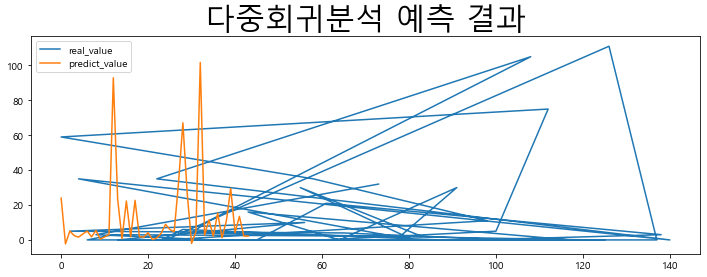

In [29]:
# 예측값 시각화
fig = plt.figure(figsize=(12,4))
graph = fig.add_subplot(1,1,1)
graph.plot(y_test, label='real_value')
graph.plot(gscv_model_elastic_pred, label='predict_value')
graph.set_title('다중회귀분석 예측 결과', size=30)
plt.legend(loc='upper left')
plt.show()